## 🌾 **A Data-Driven Investigation into Climate, Pesticides, and Crop Yields**

### **Business Understanding**

Agriculture is the backbone of global food security, and accurate prediction of crop yield is essential for ensuring sustainable production and informed policy-making. With increasing pressure from climate change, evolving pesticide usage patterns, and the need to optimize inputs for better outcomes, stakeholders—from farmers to governments—require data-driven insights to make proactive decisions.

This project focuses on analyzing historical data related to climate conditions, pesticide usage, and crop yields for the 10 most consumed crops globally. The goal is to uncover patterns, trends, and statistically significant relationships that influence crop productivity. By developing a deep understanding of these interdependencies, this investigation aims to support strategies that enhance agricultural efficiency, minimize environmental impact, and reduce risk in food production systems.

## 📌 Project Plan

### 🧾 **Overview / Background**

With the growing global population and increasing threats from climate change, the demand for accurate, data-driven insights in agriculture has never been higher. This project explores the relationship between climate conditions, pesticide usage, and crop yields using historical data from the 10 most consumed crops worldwide. By understanding how these factors interact, the project aims to inform strategies for improving productivity, sustainability, and resilience in agricultural systems.

### ⚠️ **Challenges**

- 🌦 **Climate Variability**: Unpredictable weather patterns can obscure yield trends and complicate analysis.
- 🧪 **Data Quality**: Issues like missing values, inconsistent units, and outliers may affect data reliability.
- 🌍 **Regional Differences**: Yield determinants may vary significantly across countries, complicating generalized conclusions.
- 📉 **Complex Interactions**: The interplay between pesticides, rainfall, and temperature can be nonlinear and hard to isolate without robust statistical methods.

### 💡 **Proposed Solution**

The project will follow a structured data science pipeline starting with rigorous data cleaning and exploration. It will use descriptive statistics and hypothesis testing to uncover meaningful patterns and relationships between climate factors, pesticides, and yield performance. Insights will be visualized for interpretability and aimed at supporting better decision-making in crop management, policy formulation, and risk mitigation.

### ❗ Problem Statement

Accurately predicting crop yield remains a significant challenge due to the complex and often unpredictable nature of climate variability, inconsistencies in data quality, and the diverse agricultural practices across different regions. The presence of missing values, non-uniform data entries, and outliers further complicates the analysis. Additionally, the intricate interactions between environmental factors such as temperature, rainfall, and pesticide usage make it difficult to isolate and understand their individual and combined effects on crop productivity.

### 🎯 Project Objectives

The primary objective of this project is to conduct a comprehensive, data-driven investigation into the factors affecting crop yield, with a focus on climate variables and pesticide usage. Specific objectives include:

1. **Understand the Dataset**: Explore and describe the structure, variables, and distribution of the crop yield dataset to gain a clear understanding of its scope and limitations.

2. **Assess Data Quality**: Identify and address missing values, inconsistencies, outliers, and other data quality issues to ensure reliable and accurate analysis.

3. **Perform Exploratory Data Analysis (EDA)**: Visualize and summarize the data to detect trends, patterns, and potential relationships between climate factors, pesticide usage, and crop yield.

4. **Apply Computational Statistics**: Use statistical techniques to test hypotheses and measure the strength and significance of associations between variables.

5. **Generate Insightful Visuals**: Create intuitive charts and graphs that clearly communicate key findings to both technical and non-technical stakeholders.

6. **Support Decision-Making**: Derive actionable insights that can inform agricultural policy, resource allocation, and climate-resilient crop management strategies.

7. **Lay the Foundation for Predictive Modeling**: Prepare the dataset and insights in a way that supports the development of future machine learning models for crop yield prediction.




### 🧾 **Conclusion**

This project serves as a practical and insightful exploration into how climate factors and pesticide usage impact crop yields, with a focus on data quality, analysis, and statistical reasoning. By leveraging data science techniques in the agritech domain, the investigation aims to generate actionable insights that can support more sustainable and productive agricultural practices. The findings are expected to contribute toward data-informed decisions in food security, environmental management, and policy development.




### 🔍 **Step 2: Data Understanding**

The objective of this phase is to **explore and assess the dataset** to uncover quality issues and extract initial insights that guide further analysis.

#### 📊 **Dataset Overview**
- **Columns Description**: Review each column to understand its meaning, data type, and role in the analysis (e.g., crop type, country, year, yield, rainfall, temperature, pesticide usage).
- **Data Types**: Ensure columns have appropriate formats (e.g., numerical, categorical, datetime).

#### ✅ **Key Checks**
- 🟨 **Missing Values**: Identify and quantify null or NaN entries.
- 📏 **Uniformity**: Check for consistent units, naming conventions, and formats.
- ⚠️ **Outliers**: Detect unusual values that may skew analysis.
- ♻️ **Duplicates**: Look for repeated rows or records.
- 🧹 **Noise/Errors**: Spot typos, impossible values (e.g., negative rainfall), and inconsistent labeling.

This step sets the foundation for effective cleaning, analysis, and modeling by ensuring the **data is reliable, accurate, and ready for deeper investigation**.


In cell below import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from load import load_data

Load data in cell below 

In [8]:
# load data

yield_df = pd.read_csv("Data/Agritech/yield_df.csv", index_col=0)
yield_df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In cell below I check the shape of `yield_df` using `.shape`

In [9]:
yield_df.shape

(28242, 7)

Cell above shows that `yield_df` contains `28242` entries and `8` features.

In cell below I execute `.info()` to check metadata summarry

In [10]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In cell above the metadata reveals `yield_df` contains of `7` features both with **non missing values**. Tow of features are `objects` while 5 are `int64` and `float64`.

Below I perfom statistical summary using `.describe()`

In [11]:
# statistics summary
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


## 🧹 **Data Preparation**

This phase focuses on transforming raw data into a clean and analysis-ready format. Preparing the dataset is crucial to ensure that insights drawn later are accurate, meaningful, and unbiased. The quality of the data directly influences the outcome of the analysis and any models built upon it.

Key steps include:

- 🔍 **Checking for Data Inconsistencies**: Identify and resolve issues such as inconsistent naming conventions, duplicated entries, or incorrect data types.

- ❓ **Handling Missing Values**: Detect and appropriately address null or empty values that could skew results.

- ⚠️ **Detecting and Treating Outliers**: Locate unusually high or low values that may distort analysis and handle them accordingly.

- 🧾 **Data Formatting**: Standardize formats across the dataset (e.g., date formats, numerical precision, unit conversions) to ensure consistency and compatibility during analysis.

By the end of this stage, the dataset will be cleaner, more reliable, and ready for effective exploratory data analysis and statistical testing.

In cell below I create a copy of dataset from original for use to avoid tumpering with original dataset. I store the copy under variable `yield_copy`. Then proceeds to group my into `numeric` and `categorical` for easy and efficient cleaning.


In [12]:
# create a copy of the dataframe for further analysis
yield_copy = yield_df.copy()

In [18]:
# select numeric columns
numeric_df = yield_copy.select_dtypes(include =[np.number]).columns.tolist()
numeric_df

['Year',
 'hg/ha_yield',
 'average_rain_fall_mm_per_year',
 'pesticides_tonnes',
 'avg_temp']

In [35]:
# check for shape of numeric columns
yield_copy[numeric_df].shape

(28242, 5)

After selecting `numeric columns` from yield_copy I store them under variable `numeric_df`. I clean it separate from `categorical columns`.

In cell below I check for missing values

In [19]:
# check for missing values

(yield_copy[numeric_df].isna().sum()/ len(yield_copy[numeric_df]))* 100

Year                             0.0
hg/ha_yield                      0.0
average_rain_fall_mm_per_year    0.0
pesticides_tonnes                0.0
avg_temp                         0.0
dtype: float64

The cell above indicates all numeric_df columns as no **missing values**

In cell below I check for **duplicates** in numeric_df

In [24]:
# check for duplicates

yield_copy[numeric_df].duplicated().sum()

np.int64(2323)

numeric_df shows some duplicates but from data understanding we can't deal we them as most are `yield` of crop but from different `area` , `Hectograms per Hectare Yield` and `year`.

In cell below I check for outliers in numeric_df



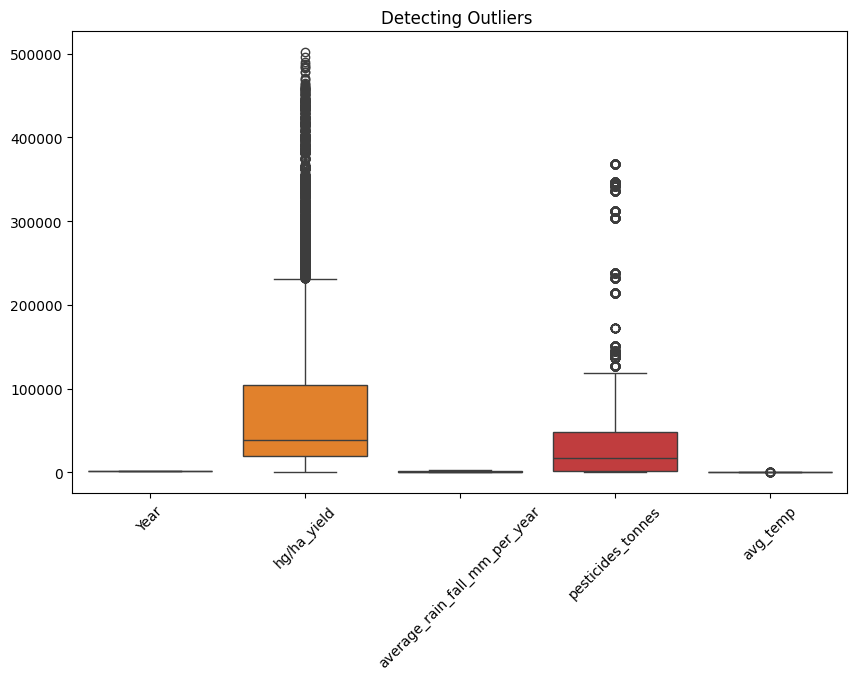

In [26]:
# check for outliers using boxplot

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = yield_copy[numeric_df], ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.set_title("Detecting Outliers ")
plt.show()




From the `boxplot` above shows that `hg/ha_yield` and `pesticides_tonnes` contains most outliers.

- Heavy outlier presence: Many values far above upper whisker.
- Indicates some countries/crops achieve very high yields — could be due to advanced farming, outlier crops (like sugar beet), or reporting anomalies.

`average_rain_fall_mm_per_year` Mostly within whiskers, but a few outliers on the higher end.

`pesticides_tonnes` Strong right skew, many outliers.

Suggests that while most countries use low pesticides, a few use extremely high amounts.

`avg_temp` Fairly tight distribution.

In cell below I write a function to remove the outliers for better anlysis

In [43]:
# remove outliers 

def remove_outliers(df, column):
    """Remove outliers from a DataFrame based on the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data = yield_copy[numeric_df]
columns_to_remove = ['hg/ha_yield', 'pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp' ]

for col in columns_to_remove:
    yield_copy = remove_outliers(data, columns_to_remove)


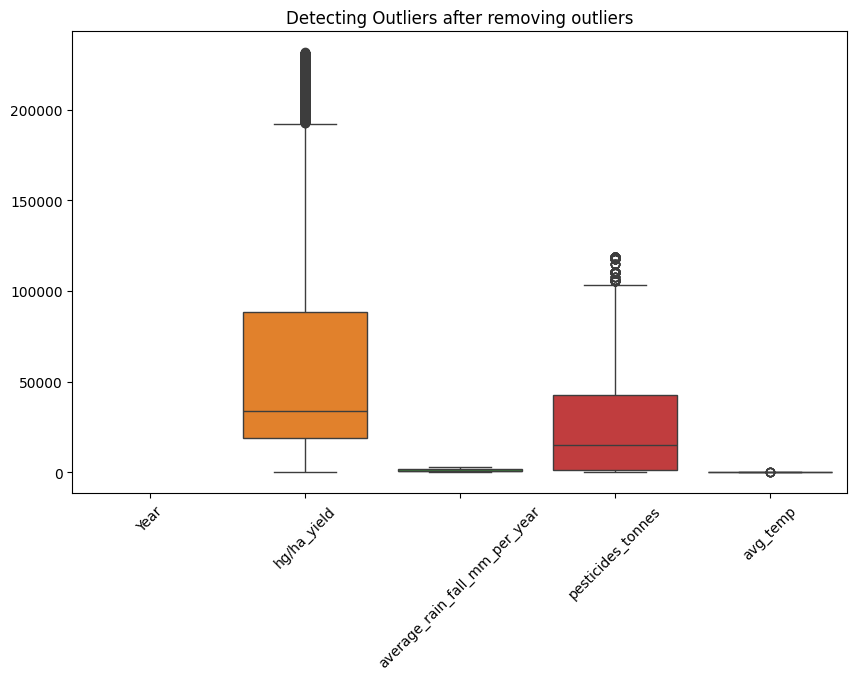

In [44]:
# check for outliers after removing outliers

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = yield_copy, ax=ax)
ax.tick_params(axis='x', rotation=45)       
ax.set_title("Detecting Outliers after removing outliers")
plt.show()

`hg/ha_yield (hectogram per hectare yield)` There's a significant reduction in extreme outliers compared to your earlier plot.

- However, a few high-yield outliers still remain — likely valid extreme values rather than noise.

`pesticides_tonnes` Outliers have reduced, but several points are still marked outside the whiskers.

- This suggests a right-skewed distribution, where a small number of countries/years used a disproportionately large amount of pesticides.



In cell below I select `categorical` columns from the `yield_copy` and clean it for analysis. I store the columns under variable `categorical_df`. 

In [45]:
# select categorical columns

categorical_df = yield_copy.select_dtypes(include=[np.object_]).columns.tolist()
categorical_df

[]

`categorical_df` contains only two columns.

In cell below I check for missing values on `categorical_df`

In [37]:
# check for missing values

yield_copy[categorical_df].isna().sum()/ len(yield_copy[categorical_df]) * 100

Area    0.0
Item    0.0
dtype: float64

`categorical_df` shows no missing values.

In cell below I look for duplicates contained in `categorical_df`

In [46]:
yield_copy[categorical_df].duplicated().sum()

np.int64(0)

Indicates there are some duplicates but after deep understanding of data the values showing duplicates can't be removed as they represent different item in different year. 

## 📊 **Exporatorly Data Analysis**